# <span style="color: #084B8A;">Análisis numérico</span>
## Python - Notas de clase  
***Facultad de Ciencias, UNAM***  
*Semestre 2022-1*  
Jorge Zavaleta Sánchez

# Gráficas de funciones

En *Python* es posible realizar gráficas de funciones reales ($f:[a,b]\subset \mathbb{R}\to \mathbb{R}$) y funciones escalares ($f:[a,b]\times[c,d]\subset \mathbb{R}^{2}\to \mathbb{R}$), entre otras. Para este fin se usará el módulo ```matplolib```, en particular ```pyplot``` para realizar gráficas en 2D y ```mplot3D``` para gráficas en 3D. Las funciones y forma de usar son similares a las funciones que se ocupan en *Matlab/Octave*.

Lo primero que se necesita es cargar todos los módulos necesarios para poder crear las gráficas.

In [153]:
# Cargamos las librerias y paquetes
from matplotlib import pyplot as plt #Graficas 2D
from mpl_toolkits.mplot3d import Axes3D #Graficas 3D
%matplotlib inline

Aunque ```matplotlib``` fue inicialmente concebida para crear gráficos en 2D, después se extendió su uso para gráficas en 3D. La instrucción ```%matplolib``` es lo que se conoce como una *función mágica* dentro del shell interactivo *IPython* que usa *Jupyter*. Esto permite tener un modo interactivo con las gráficas si se cambia ```inline``` por ```notebook```. Si se omite, en las libretas queda en forma ```inline```. Información adicional puede ser encontrada en la siguiente [liga](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline).

### Gráficas 2D

Para crear gráficas en 2D debemos usar la función ```plot``` que se encuentra en ```pyplot```. En este caso la sintaxis básica es la siguiente:
```python
plt.plot(x,y,[fmt])
```
donde ```x``` son las abscisas, ```y``` son las ordenadas y ```fmt``` (opcional) corresponde a una cadena que define el formato básico para la apariencia de las líneas. La documentación completa de la función ```plot``` puede ser consultada en la siguiente [liga](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Para mostrar su uso considérese los siguientes ejemplos.

Dame el numero de puntos a graficar: 60


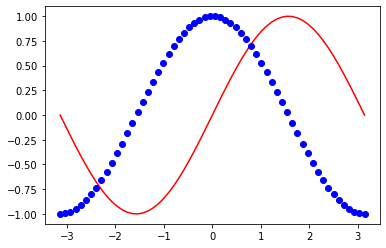

In [154]:
puntos = int(input('Dame el numero de puntos a graficar: '))
x = np.linspace(-np.pi,np.pi,puntos)
y,z = np.sin(x),np.cos(x)
plt.plot(x,y,'-r')
plt.plot(x,z,'ob')
plt.show()

En este caso se usan funciones que se encuentran dentro del módulo ```numpy``` para generar el conjunto de coordenadas donde se evalúa la función. En particular, se usa ```linspace``` para crear las abscisas y después se evalúan estas en una función para obtener las ordenadas que definirán el par ordenado que se gráfica mediante ```plot```. En este caso es importante poner la instrucción ```plt.show()``` para mostrar la gráfica.

Se pueden graficar varias curvas en una misma figura al ejecutar la instrucción ```plot``` con diferentes conjuntos de pares ordenados, como en el ejemplo anterior. Se pueden dar modificaciones en el aspecto de las curvas, como son el color, grosor, marcadores. etc. Todo esto puede ser consultado en la [documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

En los ejemplos se usarán los arreglos (```ndarray```) de ```numpy``` debido a las funcionalidades que estos proveen, pero es posible utilizar otros tipos de datos, como listas o tuplas, para mandar las coordenadas a la función ```plot```. Por ejemplo, usando listas

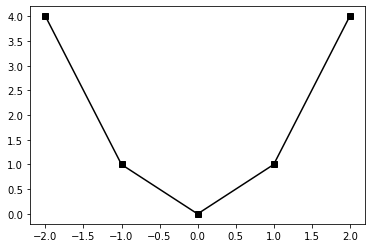

In [155]:
u = [-2,-1,0,1,2]
v = list(map(lambda x:x**2,u))
plt.plot(u,v,'sk-')
plt.show()

También es posible crear etiquetas para los ejes, leyendas y títulos que soportan comandos en *LaTeX*. Estás son propiedades que pertenecen a los ejes, por lo cual es necesario obtener el control sobre los ejes actuales mediante la función ```gca()```. Esto se muestra en el siguiente ejemplo

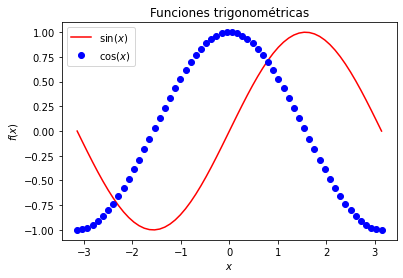

In [156]:
x = np.linspace(-np.pi,np.pi,puntos)
y,z = np.sin(x),np.cos(x)
plt.plot(x,y,'-r',label='$\sin(x)$')
plt.plot(x,z,'ob',label='$\cos(x)$')
ax = plt.gca() # Se obtiene el control para los ejes actuales
ax.set_xlabel("$x$") # Etiqueta eje x
ax.set_ylabel("$f(x)$") # Etiqueta eje y
ax.set_title("Funciones trigonométricas") # Titulo
ax.legend(loc = 'upper left') # Leyenda a partir de las etiquetas
plt.savefig('Fig.pdf') # Guardamos la figura en el archivo Fig.pdf

**Nota**: Es posible guardar la imagen en un archivo mediante la función ```savefig```, la cual soporta diferentes tipos de archivos, incluyendo los más comunes como ```.pdf```, ```.png```, ```.jpg```, ```.eps```, etc. Cuando se guarda a un archivo, hay que omitir la instrucción ```plt.show()```, para que la gráfica se imprima al archivo y no al visualizador de la libreta.

Es posible generar graficas donde solo aparecen puntos dispersos sin lineas mediante la función ```scatter```.

Dame el numero de puntos a graficar: 150


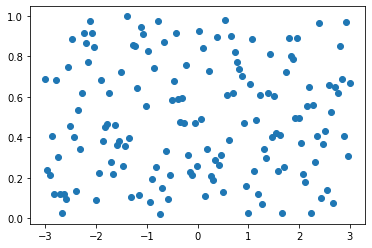

In [157]:
puntos = int(input('Dame el numero de puntos a graficar: '))
x = np.linspace(-3,3,puntos)
y = np.random.rand(puntos)
plt.scatter(x,y)
plt.show()

### Gráficas 3D

Para cambiar la perspectiva de los ejes a tres dimensiones se utiliza ```Axes3D```, lo cual da el efecto de profundidad. Esto se hace a través de dos instrucciones

```python
fig = plt.figure()
ax = Axes3D(fig)
```

donde la primera instrucción crea una figura y la segunda crea los ejes con perspectiva en 3 dimensiones. Para mostrar su uso, se hará un ejemplo con la curva paramétrica $$x = \sin(2t),$$ $$y = \cos(2t),$$ $$z = \frac{t}{2},$$ con $0\leq t\leq 6\pi$.


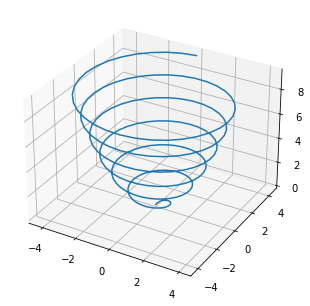

In [158]:
# Ejemplo de curva paramétrica
fig = plt.figure()
ax = Axes3D(fig)
t = np.linspace(0,6*np.pi,200)
x = np.sqrt(t)*np.sin(2*t)
y = np.sqrt(t)*np.cos(2*t)
z = 0.5*t
plt.plot(x, y, z) 
plt.show()

La función ```plot``` en este caso hace la gráfica tomando en cuenta la profundidad y genera una figura en 3D. También es posible hacerlo usando la siguiente instrucción

```python
ax = plt.axes(projection = '3d')
```

pero cargando el modulo ```mplot3d``` directamente

```python
from mpl_toolkits import mplot3d
```

Con esta forma, se cambia la perspectiva directamente desde los ejes a través de la opción ```projection```, aunque esto ya se cambió en la versión actual de ```matplotlib``` por la usada en el ejemplo anterior, y ya no se recomienda. De todas maneras, el código para generar la misma figura con este procedimiento desde cero, quedaría de la siguiente manera:

```python
import numpy as np #Rutinas numericas
from matplotlib import pyplot as plt #Graficas 2D
from mpl_toolkits import mplot3d #Graficas 3D

ax = plt.axes(projection = '3d')
t = np.linspace(0,6*np.pi,200)
x = np.sqrt(t)*np.sin(2*t)
y = np.sqrt(t)*np.cos(2*t)
z = 0.5*t
ax.plot(x, y, z)
plt.show()
```

la cual pueden probar en una libreta aparte o desde un archivo *.py*.

También se pueden generar superficies a partir de funciones escalares $f(x,y)\colon\mathbb{R}^2 \to \mathbb{R}$. Para ello se necesita de una malla para tener los puntos de evaluación y generar los pares ordenados en arreglos. En *Python*, para hacer esto (en *Matlab/Octave* es de forma análoga) se puede usar la función ```meshgrid``` de ```numpy```. El código para generar la gráfica de la función $$f(x,y) = \cos(x)e^{\sin(y)}$$ como una superficie mediante la función ```plot_surface``` se da a continuación.

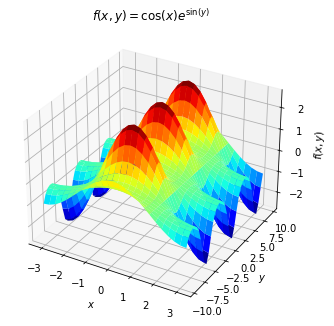

In [159]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-np.pi,np.pi,25)
y = np.linspace(-3*np.pi,3*np.pi,40)
X,Y = np.meshgrid(x,y)
Z = np.cos(X)*np.exp(np.sin(Y))
ax.plot_surface(X, Y, Z,cmap='jet')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$")
ax.set_title("$f(x,y) = \cos(x)e^{\sin(y)}$")
#plt.savefig("superficie.pdf")
plt.show()

El mapa de colores se cambia a través de la opción ```cmap``` y tienen nombres parecidos a los usados en *Matlab/Octave*. Puede consultar la siguiente [liga](https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#colormaps) para los mapas de colores disponibles o la [documentación](https://matplotlib.org/stable/tutorials/colors/colormaps.html) de ```matplotlib```.

Se pueden generar gráficas sin los parches rellenos, es decir, mostrando solo la malla con el comando ```plot_wireframe``` donde los colores de las líneas se cambian a través de la opción ```color``` (valores disponibles en la siguiente [liga](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)).

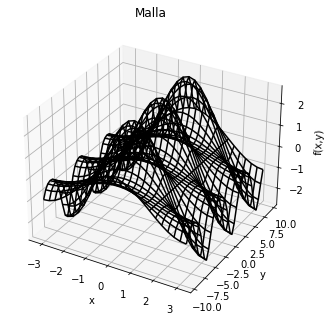

In [160]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-np.pi,np.pi,25)
y = np.linspace(-3*np.pi,3*np.pi,40)
X,Y = np.meshgrid(x,y)
Z = np.cos(X)*np.exp(np.sin(Y))
ax.plot_wireframe(X, Y, Z,color='black')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Malla")
plt.savefig("Malla.pdf")

Se pueden realizar mapas de contorno mediante la función ```contour3D``` y ver la variación de las alturas al cambiar el mapa de colores. Para cambiar la vista inicial de la gráfica se usa ```view_init``` donde el primer argumento es la *elevación* y el segundo el *azimut*. El *azimut*, es la rotación horizontal alrededor del eje $z$, medida en grados desde el eje $y$ negativo. Los valores positivos indican la rotación en sentido contrario a las manecillas del reloj del punto de vista. La *elevación* es la rotación vertical del punto de vista en grados. Los valores positivos de *elevación* corresponden a moverse por encima del objeto; los valores negativos corresponden a moverse debajo del objeto.

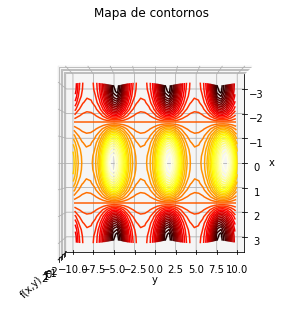

In [161]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-np.pi,np.pi,25)
y = np.linspace(-3*np.pi,3*np.pi,40)
X,Y = np.meshgrid(x,y)
Z = np.cos(X)*np.exp(np.sin(Y))
ax.contour3D(X, Y, Z,50,cmap='hot')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Mapa de contornos")
ax.view_init(90,0) #Vista desde arriba
plt.show()

Se pueden crear graficas de nubes de puntos con ```scatter3D```

Dame el numero de puntos a graficar: 300


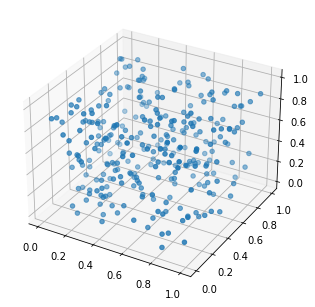

In [162]:
puntos = int(input('Dame el numero de puntos a graficar: '))
fig = plt.figure()
ax = Axes3D(fig)
x = np.random.rand(puntos)
y = np.random.rand(puntos)
z = np.random.rand(puntos)
ax.scatter3D(x,y,z)
plt.show()

O también es posible combinar varios tipos de gráficas en una sola figura aplicando varias funciones en un mismo eje. Esto se mostrará para la función de Rosenbrock $$f(x,y) = (a-x^2)^2 + b(y-x^2)^2,$$ con $a=1$ y $b=100$.

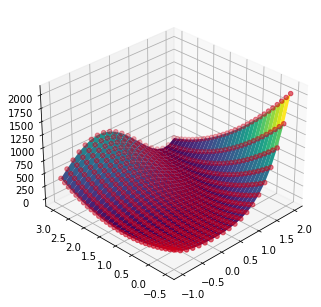

In [163]:
a,b = 1,100
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-1,2,20)
y = np.linspace(-0.5,3,30)
X,Y = np.meshgrid(x,y)
Z = (a - X)**2 + b*(Y-X**2)**2
ax.plot_surface(X,Y,Z,cmap='viridis')
ax.scatter3D(X,Y,Z,color = (0.8,0,0.1,0.7))
ax.view_init(30,-135)
plt.savefig('Rosenbrock.pdf')

Aquí para los puntos se usa la opción ```color``` tomando como valor una tupla con cuatro valores entre 0 y 1. Las tres primeras corresponden al color dado en RGB estandarizado (primera rojo, segunda verde y tercera azul) y una cuarta componente para el *canal alfa* (transparencia).

Por último, es posible generar varias gráficas en una misma figura con la función ```subplot```. Esto se muestra con el siguiente ejemplo:

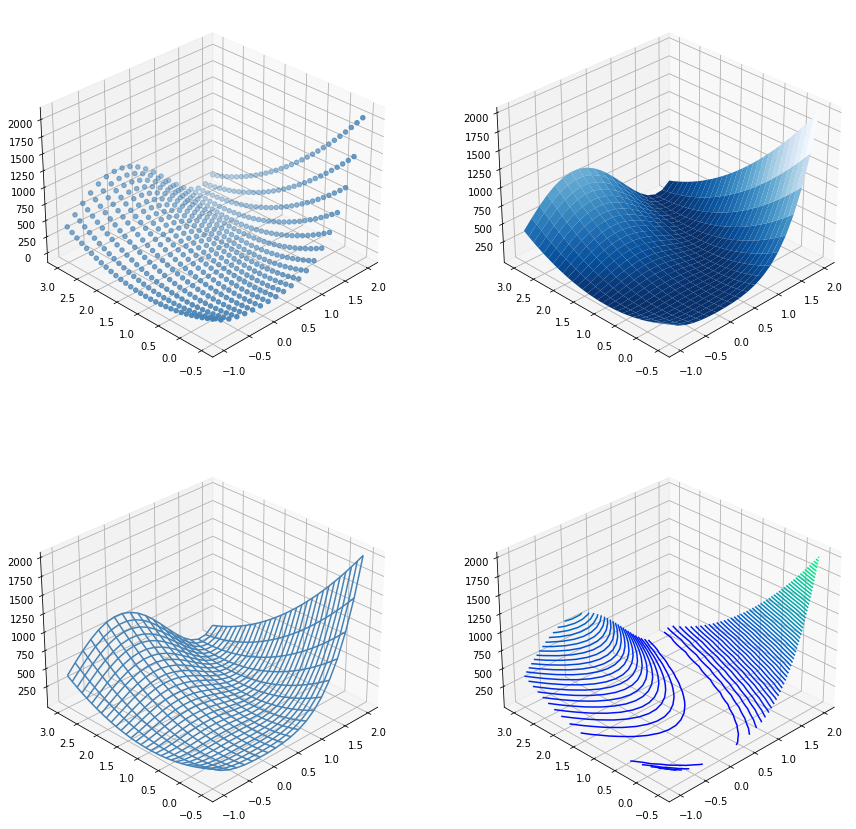

In [164]:
fig = plt.figure(figsize=(15,15)) # Dimensiones de la figura en pulgadas anchura y altura.

ax1 = plt.subplot(2,2,1, projection='3d')
ax1.scatter3D(X,Y,Z,color = (.275, .51, .706,1))
ax1.view_init(30,-135)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.plot_surface(X,Y,Z,cmap='Blues_r')
ax2.view_init(30,-135)

ax3 = plt.subplot(2,2,3, projection='3d')
ax3.plot_wireframe(X, Y, Z,color='steelblue')
ax3.view_init(30,-135)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.contour3D(X,Y,Z,50,cmap='winter')
ax4.view_init(30,-135)

plt.show()

En este caso, para manejar las diferentes subgráficas se usa la idea de una tabla donde el primer argumento es el numero de renglones, el segundo el número de columnas y el tercero es un índice que índica la celda de la subgráfica actual. Este índice comienza en ```1``` que corresponde a la esquina superior izquierda y se van recorriendo de izquierda a derecha por renglones. Del ejemplo anterior, la distribución de los índices que se tiene es

$$
\begin{array}{|c|c|}\hline
    1 & 2 \\\hline
    3 & 4 \\\hline
\end{array}
$$

La distribución de las subgráficas puede ser más compleja, para más ejemplos e información revise esta [liga](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) o la [documentación](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) de ```matplotlib```.

### Ejemplos

#### Ejemplo 15 (Coordenadas de una circunferencia)

En este ejemplo se definirá una función para obtener las coordenadas cartesianas de una circunferencia con radio ```r``` y centro ```c```. Para ello usaremos la parametrización de la circunferencia, donde el parámetro será el ángulo $\alpha$, medido en radianes, entre el semieje positivo $x$ y el segmento que une el origen con el punto sobre la circunferencia, como se muestra en la siguiente figura.

<img src="circunferencia.png" alt="Drawing" style="width: 350px;"/>

Recordando que en un triángulo rectángulo, como el que se muestra en la figura 
$$
\sin(\alpha) = \frac{\text{cateto opuesto}}{\text{hipotenusa}} = \frac{y}{h}\qquad \cos(\alpha) = \frac{\text{cateto adyacente}}{\text{hipotenusa}} = \frac{x}{h},
$$
se puede calcular las coordenadas sobre la circunferencia al despejar $x$ y $y$ de las ecuaciones anteriores. Esta definición sólo se puede usar para $0\leq\alpha\leq\pi/2$, pero como determinar $x$ y $y$ sigue siendo cierto para $0\leq\alpha\leq2\pi$. Esto se debe a las definiciones de las funciones trigonométricas seno y coseno, ya que sus valores coinciden con las coordenadas de un círculo de radio 1 centrado en el origen.

De esta manera, si $0\leq \alpha \leq 2\pi$, se tiene que $$x = r\cos(\alpha)$$ y $$y = r\sin(\alpha).$$ Si se quiere variar el centro, lo único que hay que hacer es una traslación de las coordenadas del circulo, por lo que las coordenadas para un círculo con centro $c = (c_{x},c_{y})$ están dadas por: $$x = r\cos(\alpha) + c_{x}$$ y $$y = r\sin(\alpha) + c_{y}.$$

In [165]:
#from matplotlib import pyplot as plt
#import numpy as np

def circunferencia(c = [0,0],r = 1,p = 100):
    """Calcula las coordenadas cartesianas de un circulo de radio r y centro c.
    c - Arreglo de tamaño 2. Coordenas del centro.
    r - Real. Radio.
    p - Entero. Numero de puntos para construir la curva.
    """
    t = np.linspace(0,2*np.pi,p)
    x = r*np.cos(t) + c[0]
    y = r*np.sin(t) + c[1]
    return x,y

def dibujaCirc(c,r):
    """Dibuja un circulo de radio r y centro c.
    c - Arreglo de tamaño 2. Coordenas del centro.
    r - Real. Radio.
    """
    x,y = circunferencia(c,r)
    rx,ry = r*np.cos(np.pi/4)+c[0],r*np.sin(np.pi/4)+c[1]
    plt.plot(x,y,'steelblue',[c[0],rx],[c[1],ry],'--r',c[0],c[1],'ko')
    plt.text((c[0]+rx)/2,(c[1]+ry)/2-r*0.1,f"r = {r:2.1f}")
    plt.text(c[0],c[1]-r*0.15,f"({c[0]:2.1f},{c[1]:2.1f})",horizontalalignment = 'center')
    ax = plt.gca()
    ax.set_aspect(1)
    plt.show()

Dame el centro (como una lista): 1.5,3.2
Dame el radio: 3


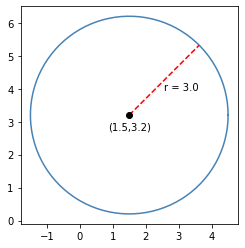

In [166]:
c = eval(input("Dame el centro (como una lista): "))
r = float(input("Dame el radio: "))
dibujaCirc(c,r)

# Manejo de excepciones

Incluso si una declaración o expresión es sintácticamente correcta, puede generar un error cuando se intenta ejecutar. Los errores detectados durante la ejecución se llaman excepciones, informando al usuario de que existe algún problema. Si la excepción no se captura el flujo de ejecución se interrumpe y se muestra la información asociada a la excepción en la consola de forma que el programador pueda solucionar el problema.

En *Python* se utiliza una construcción ```try``` - ```except``` para capturar y tratar las excepciones. El bloque ```try``` (*intentar*) define el fragmento de código en el que creemos que podría producirse una excepción. El bloque ```except``` (*excepción*) permite indicar el tratamiento que se llevará a cabo de producirse dicha excepción. Muchas veces nuestro tratamiento de la excepción consistirá simplemente en imprimir un mensaje más
amigable para el usuario, otras veces nos interesará registrar los errores y de vez en cuando podremos establecer una estrategia de resolución del problema.

Por ejemplo, cuando tratamos de ingresar un valor por teclado y se da un valor diferente al esperado.

In [167]:
try:
    w = int(input("Dame un numero entero: "))
    print(w)
except:
    print("Error en los argumentos de entrada")

Dame un numero entero: 4.5
Error en los argumentos de entrada


*Python* permite utilizar varios ```except``` para un solo bloque ```try```, de forma que podamos dar un tratamiento distinto a la excepción dependiendo del tipo de excepción de la que se trate. Esto es una buena
práctica, y solo es necesario indicar el nombre del tipo a continuación de ```except```.

In [168]:
try:
    w = float(input("Dame un numero: "))
    v = float(input("Dame otro numero: "))
    print(f"{w}/{v} = {w/v}")
except ValueError:
    print("Error en los argumentos de entrada, estos deben ser numéricos")
except ZeroDivisionError:
    print("El valor del divisor debe ser distinto de cero")

Dame un numero: 4
Dame otro numero: 0
El valor del divisor debe ser distinto de cero


Además podemos hacer que un mismo except sirva para tratar más de una excepción usando una tupla para listar los tipos de error que queremos que trate el bloque:

In [169]:
try:
    num = eval(input("Dame una expresión: "))
    print(num)
except (NameError,TypeError,SyntaxError):
    print("Ocurrio un error de cierto tipo")
except:
    print("Sucedio un error imprevisto")

Dame una expresión: "Hola'
Ocurrio un error de cierto tipo


Una lista de las excepciones por defecto en *Python* se puede consultar en la siguiente [liga](https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion9/exceptions.html).

# Manejo de archivos

Ahora veremos la manipulación de archivos mediante Python. Es importante saber como importar y exportar datos desde un archivo ya que cuando se manejan volúmenes de información grandes es complicado pedir los datos al usuario a través de *input*.

Las funciones para manipular archivos en python son las siguientes:

| Comando/función 	|        Sintaxis        	|                                                Descripción                                               	|
|:---------------:	|:----------------------:	|:--------------------------------------------------------------------------------------------------------:	|
|      *open*     	| f = open(archivo,modo) 	|             Da el acceso a un archivo con nombre *archivo* con permisos definidos por *mode*.            	|
|     *close*     	|        f.close()       	|                                      Cierra el acceso al documento.                                      	|
|     *write*     	|     f.write(cadena)    	|                             Escribe el texto dado en *cadena* en el archivo.                             	|
|      *read*     	|      f.read(valor)     	| Lee todo el contenido de un archivo a menos que se especifique el número de caracteres (*valor*) a leer  	|
|    *readline*   	|      f.readline()      	|                                         Lee una línea del archivo                                        	|
|   *readlines*   	|      f.readlines()     	|                             Lee todas las líneas y las devuelve en una lista                             	|


Todos los argumentos de las funciones son cadenas excepto *valor* el cual debe ser *int*. El argumento *archivo* puede contener la ruta del archivo. Cuando queremos leer todo el archivo con *read* se usa la sintaxis *f.read()*. Los modos o permisos de acceso a un archivo definidos por *mode* son los siguientes:

| Modo 	| Significado 	|                                       Descripción                                      	|
|:----:	|:-----------:	|:--------------------------------------------------------------------------------------:	|
|  'r' 	|   Lectura   	| *Valor por defecto*. Abre el archivo para lectura, marca error si el archivo no existe 	|
|  'a' 	|   Agregar   	|               Abre un archivo para agregar, crea el archivo si no existe               	|
|  'w' 	|  Escritura  	|              Abre un archivo para escritura, crea el archivo si no existe              	|
|  'x' 	|    Crear    	|          Crea el archivo especificado, devuelve un error si el archivo existe          	|

## Ejemplos

### Ejemplo 16 (Agenda)

Para ejemplificar su uso, se mostrara como implementar una agenda con tres datos agregados por el usuario, que son el nombre del contacto, el número de teléfono y correo electrónico del contacto que quiera agregar a la agenda. La base de datos se hará a través de un archivo *csv* (valores separado por comas), que es un formato de archivo simple para guardar información. Cuando se ejecuta el programa, se carga en memoria el archivo con la base de datos y cuando se sale de el se guardan los cambios hechos directo al archivo.

In [170]:
def crearContacto(nombre,telefono,email,L):
    L.append(nombre+","+telefono+","+email)

def guardarAgenda(L):
    fileID = open("Agenda.csv",'w')
    for elem in L:
        fileID.write(elem+"\n")
    fileID.close()

def imprimirAgenda(L):
    for elem in L:
        M = elem.split(",")
        print(f"Nombre: {M[0]}\nTelefono: {M[1]}\nCorreo electrónico: {M[2]} \n")

def LeerAgenda():
    try:
        fileID = open("Agenda.csv",'r')
        L = list(map(lambda elem:elem.strip('\n'),fileID.readlines()))
        #LL = fileID.readlines()
        #L = []
        #for elem in LL:
        #    L.append(elem.rstrip('\n'))
        #LL.clear()
        fileID.close()
    except (FileNotFoundError):
        open("Agenda.csv",'x')
        L = []
    return L

In [171]:
flag = True
agenda = LeerAgenda()
while flag:
    opt = input("""<<<Bienvenido a la agenda>>>\n
    1.- Crear nuevo contacto
    2.- Ver contactos
    3.- Salir\n
    Elige una opción:> """)
    if opt == "1":
        print("Escribe los siguientes datos")
        nom = input("Nombre: ")
        tel = input("Telefono: ")
        email = input("Correo electronico: ")
        crearContacto(nom,tel,email,agenda)
        print("El contacto se creo con exito")
    elif opt == "2":
        if len(agenda) == 0:
            print("La agenda no tiene contactos")
        else:
            imprimirAgenda(agenda)
    elif opt == "3":
        flag = False
        guardarAgenda(agenda)
    else:
        print("Opcion no disponible. Intenta con otra opción")
    if flag:
        input("Presione una tecla para continuar")

<<<Bienvenido a la agenda>>>

    1.- Crear nuevo contacto
    2.- Ver contactos
    3.- Salir

    Elige una opción:> 3


### Ejemplo 17 (Conversión de un ndarray a $\LaTeX$ )

En este ejemplo se presenta una función que nos permite exportar un ```ndarray``` a código de $\LaTeX$.

#### Función ndarray2latex

* **Descripción**
    * Función que convierte un *ndarray* (dimensión 1 y 2) en código LaTeX y la guarda directamente a un archivo .tex para ser usada mediante \input{nombre_archivo.tex}. 

* **Variables de entrada**
    * *M*        - *ndarray* (dimensión 1 y 2). Arreglo de *numpy* que se quiere exportar en formato LaTeX.
    * *ndec*     - *int*. Define la cantidad de dígitos decimales (precisión) con la que se guardarán las entradas del arreglo M. Si no se especifica por defecto *ndec = 5*.
    * *ndig*     - *int*. Define la mínima cantidad de dígitos con la que se guardarán las entradas del arreglo M. Si el número de dígitos de las entradas de M es menor que *ndig*, entonces se imprimaran espacios en blanco para completar *ndig* caracteres. Si no se especifica por defecto *ndig = 10*.
    * *filename* - *str*. Nombre del archivo al cual se exportara el arreglo. Por defecto *filename = 'matriz.tex'*
    * *typeV*    - *str*. Indica si un arreglo unidimensional se guardará como un un vector columna (*typeV = 'C'*) o como un vector fila (*typeV = 'R'*). Si no se especifica por defecto *typeV = 'C'*.

* **Variables de salida**
    * No hay variables de salida, pero se crea o sobrescribe el archivo *filename*.

In [172]:
# Tenemos que cargar numpy
# import numpy as np
def ndarray2latex(M,ndec = 5,ndig = 10,filename = 'matriz.tex',typeV = 'C'):
    # Cadena con el formato con que se imprimiran las entradas de M
    formato = '{0:'+str(ndig) + '.' + str(ndec) + 'f}'
    # Dimension de M
    s = M.shape

    # Abrimos o creamos el archivo matriz.tex en modo de escritura
    fileID = open(filename,'w')

    # Iniciamos la impresion al archivo en formato LaTeX la matriz M
    # Alineacion de las columnas. En este caso centradas
    if len(s) == 1 and typeV.upper() == 'C':
        alin = 'c'
    else:
        alin = '';
        for i in range(s[-1]):
            alin += 'c'
    
    fileID.write('\\begin{{array}}{{{0}}}\n'.format(alin)) # Abrimos entorno array
    if len(s) == 1: # Arreglos unidimensionales (vectores)
        for i in range(s[0]):
            fileID.write(formato.format(M[i])) # Escribimos la entrada i,j de M
            if typeV.upper() == 'C': #
                fileID.write('\\\\\n') # Salto de linea
            else:
                if i == s[0]-1:
                    fileID.write('\n') # Salto de linea
                else:
                    fileID.write('& ') # Separadores (alineacion)
    else: # Arreglos bidimensionales (matrices)
        for i in range(s[0]):
            for j in range(s[1]):
                fileID.write(formato.format(M[i][j])) # Escribimos la entrada i,j de M
                if j == s[1]-1:
                    fileID.write('\\\\\n') # Salto de linea
                else:
                    fileID.write(' & ') # Separadores (alineacion)
    fileID.write('\\end{array}\n')  # Cerramos entorno array
    fileID.close() # Cerramos el acceso al archivo

A continuación presentamos algunos ejemplos de su uso.

In [173]:
# Creamos una matriz aleatoria y la guardamos en matriz.tex
a = 10*np.random.random((33,15))
ndarray2latex(a,7,10)

In [174]:
# Creamos un vector por columnas y la guardamos en vectorcol.tex
b = 15*np.random.random(10)
ndarray2latex(b,0,2,'vectorcol.tex')

In [175]:
# Guardamos el vector anterior por filas con el formato por defecto en el archivo vectorrow.tex
ndarray2latex(b,typeV = 'r',filename = 'vectorrow.tex')